In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

from biosppy.signals import ecg
from scipy import signal
import heartpy as hp

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" 

# Read data

In [3]:
def hdf_to_dict(hdf_file):
    # Read all the keys in the file
    with pd.HDFStore(hdf_file, mode='r') as hdf:
        keys = hdf.keys()

    # Read all tables, store in dictionary
    data = {}
    for key in keys: data[key] = pd.read_hdf(hdf_file, key)
    return data

In [4]:
ecg_data_file = 'D:\data\ibeat\eplab\Subject29_data.hdf'
ecg_data = pd.read_hdf(ecg_data_file, 'eplab')

In [5]:
# raw_hdf = 'D:\data\ibeat\ibeat\Subject066\SE_GENERIC_DATA_EVENT_6671_001/Subject066_Device008_07202018_ibeatraw.hdf'
# raw_data = hdf_to_dict(raw_hdf)

In [6]:
alg_hdf = 'D:\data\ibeat\ibeat\Subject029\SE_GENERIC_DATA_EVENT_6671_002/Subject029_Device053_ibeat_alg.hdf'
alg_data = hdf_to_dict(alg_hdf)

In [6]:
# raw_hdf2 = 'D:\data\ibeat\ibeat\Subject029\SE_GENERIC_DATA_EVENT_6671_001/Subject029_Device029_ibeatraw.hdf'
# raw_data2 = hdf_to_dict(raw_hdf2)

In [7]:
# alg_hdf2 = 'D:\data\ibeat\ibeat\Subject029\SE_GENERIC_DATA_EVENT_6671_001/Subject029_Device029_ibeat_alg.hdf'
# alg_data2 = hdf_to_dict(alg_hdf2)

# ECG analysis

In [5]:
ecg_data.utc_adjusted.iloc[1]
ecg_data.utc.iloc[1]
#ecg_analysis.utc.iloc[1]

1525203856.0010235

In [83]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [107]:
ecg_data[ecg_data.section == 1]['utc_adjusted']

0       1525204064.00000
1       1525204064.00102
2       1525204064.00205
3       1525204064.00307
4       1525204064.00409
5       1525204064.00512
6       1525204064.00614
7       1525204064.00717
8       1525204064.00819
9       1525204064.00921
10      1525204064.01024
11      1525204064.01126
12      1525204064.01228
13      1525204064.01331
14      1525204064.01433
15      1525204064.01535
16      1525204064.01638
17      1525204064.01740
18      1525204064.01842
19      1525204064.01945
20      1525204064.02047
21      1525204064.02150
22      1525204064.02252
23      1525204064.02354
24      1525204064.02457
25      1525204064.02559
26      1525204064.02661
27      1525204064.02764
28      1525204064.02866
29      1525204064.02968
              ...       
18372   1525204082.80562
18373   1525204082.80664
18374   1525204082.80767
18375   1525204082.80869
18376   1525204082.80971
18377   1525204082.81074
18378   1525204082.81176
18379   1525204082.81279
18380   1525204082.81381


In [7]:
ecg_chunks = []
print('Analyzing {} chunks'.format(len(ecg_data.section.unique())))
for section in ecg_data.section.unique():
    ecg_section = ecg_data[ecg_data.section == section]
    
    # Run biosppy ecg analysis
    ecg_analysis = ecg.ecg(signal=ecg_section.II, sampling_rate=976.942, show=False)
    
    ecg_chunks.append(pd.DataFrame(dict(ecg_heart_rate=ecg_analysis['heart_rate'], 
                                        utc=ecg_analysis['heart_rate_ts'] + ecg_section.utc_adjusted.iloc[0])))

# Concatinate results
ecg_analysis = pd.concat(ecg_chunks)

Analyzing 2 chunks


C:\Users\admin\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\admin\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\admin\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

In [9]:
#ecg_analysis.to_csv('ecg_analysis29.csv')

In [17]:
ecg_analysis.keys()

Index(['ecg_heart_rate', 'utc'], dtype='object')

## ecg_data.section is not randomly distributed
The discontinuous data is already devided into chunks.

In [3]:
ecg_data.section.value_counts()

0.0    4036133
1.0      18402
Name: section, dtype: int64

# Beginning and end of time stamp

In [4]:
section = 0
# xxx: index of section
min(ecg_data[ecg_data.section == section].utc_adjusted)
#max(ecg_data[ecg_data.section == section].utc_adjusted)

1525208617.0

In [5]:
max(ecg_data[ecg_data.section == section].utc_adjusted)

1525212748.3936753

# PPG raw data

The iBeat raw data files have the following keys:
### Optical Data
 * /optical_streams/green/pkg1 - Green (~530nm) PPG signal from optical package (pkg) 1, ~25Hz
 * /optical_streams/green/pkg2 - Green (~530nm) PPG signal from optical packages (pkg) 2, ~50Hz
 * /optical_streams/red/pkg1, /optical_streams/red/pkg2 - Red PPG (~660nm) signal from optical packages 1 and 2, ~25Hz
 * /optical_streams/ir/pkg1, /optical_streams/ir/pkg2 - Infrared PPG (~940nm) signal from optical packages 1 and 2, ~25Hz
 
This data will have the following attributes (columns):
* utc - Universal time epoch (seconds since 1970, GMT)
* pd1 - Raw ADC measurement from package 1 photodiode
* pd2 - Raw ADC measurement from package 2 photodiode
* drive_i - drive current of LED emittor
* gain_value - Analog front end amplifier gain
* pulse_count - Number of pulses averaged for a measurement (will not effect pd1/pd2 count since it is averaged, but will effect signal quiality (SNR)) (real count is 2^(pulse_count))

Note /optica_data is also a key, but it contains the raw stream of optical samples with all wavelengths and packages interleaved, so it is not typically useful for analysis purposes. The streams are build from this data

### Accel data
* /accel_data - Raw accelerometer reading, ~ 25Hz

The data will have the following attributes (columns):
* utc - Universal time epoch (seconds since 1970, GMT)
* x, y, z - Raw measurements from the accelerometer, 4096 counts per G, (+/- 8G sensitivity)

### Contact Data
* /contact_data - Measurements from the metal contact pins on the bottom of device, ~2Hz

The data will have the following attributes (columns):
* utc - Universal time epoch (seconds since 1970, GMT)
* pad1 - Measurement from physical pad 1
* pad2 - Measurement from physical pad 2

The metal contact pin can be used as a fairly reliable boolean for contact. Their base value should be < 600, if making contact with skin, they will read > 800, usually around 2000

### Capacitance Data
* /cap_data - Measurements from the capacitive pads located on the sensorboard, just under bottom housing, ~2Hz

The data will have the following attributes (columns):
* utc - Universal time epoch (seconds since 1970, GMT)
* pad1 - Measurement from physical pad 1
* pad2 - Measurement from physical pad 2

Capacitance data is not as good for a clear binary yes/no that the device is being worn since they have more baseline variation and lower SNR. They are better at sensing the device sitting improperly, but requires some logic (that is taken into account in the contact algorithm)

In [13]:
# Sampling rate of PPG
g_pkg1 = raw_data['/optical_streams/green/pkg1']
g_pkg2 = raw_data['/optical_streams/green/pkg2']
#data = g_pkg1.pd1[(g_pkg1.utc > 1524500000) & (g_pkg1.utc < 1524501000)]
#len(data)/(1524501000 - 1524500000)

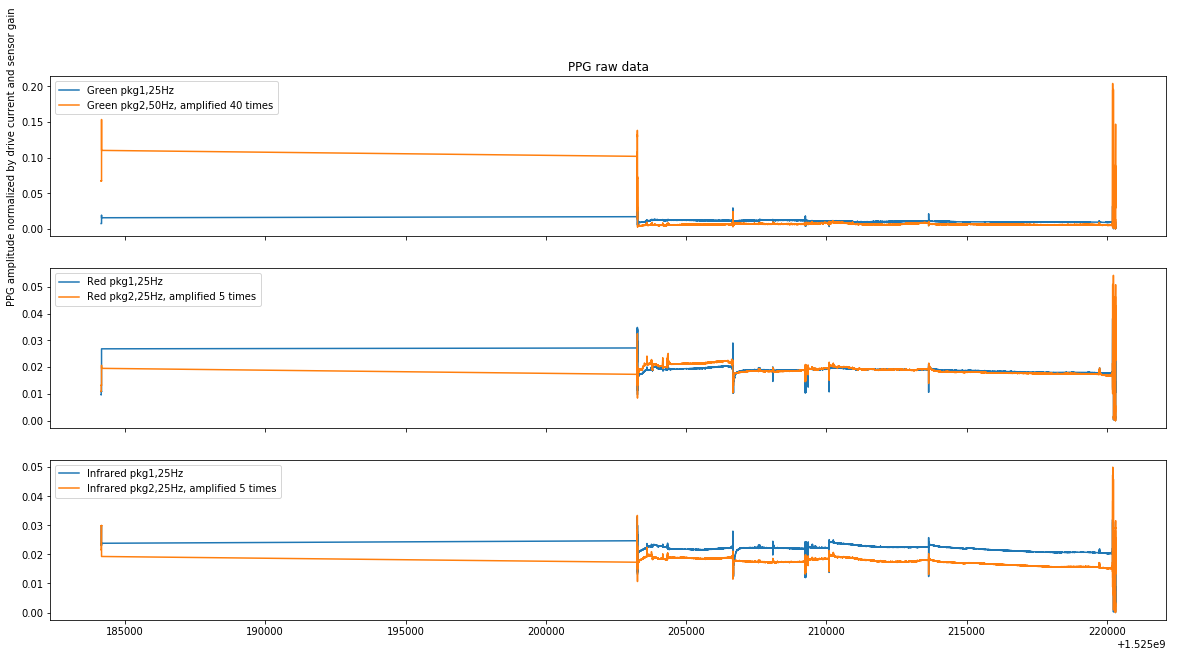

In [14]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(20,10))

g_pkg1 = raw_data['/optical_streams/green/pkg1']
g_pkg2 = raw_data['/optical_streams/green/pkg2']
ax[0].plot(g_pkg1.utc, g_pkg1.pd1 / g_pkg1.drive_i / g_pkg1.gain_value,label = 'Green pkg1,25Hz')
ax[0].plot(g_pkg2.utc, g_pkg2.pd1 / g_pkg2.drive_i / g_pkg2.gain_value*40, label = 'Green pkg2,50Hz, amplified 40 times')
ax[0].legend(loc = 2)
#ax[0].set_ylim(0,0.01)
ax[0].set_ylabel('PPG amplitude normalized by drive current and sensor gain')
ax[0].set_title('PPG raw data')


r_pkg1 = raw_data['/optical_streams/red/pkg1']
r_pkg2 = raw_data['/optical_streams/red/pkg2']
ax[1].plot(r_pkg1.utc, r_pkg1.pd1 / r_pkg1.drive_i / r_pkg1.gain_value, label = 'Red pkg1,25Hz')
ax[1].plot(r_pkg2.utc, r_pkg2.pd1 / r_pkg2.drive_i / r_pkg2.gain_value*5, label = 'Red pkg2,25Hz, amplified 5 times')
#ax[1].set_ylim(0.01,0.025)
ax[1].legend(loc = 2)


ir_pkg1 = raw_data['/optical_streams/ir/pkg1']
ir_pkg2 = raw_data['/optical_streams/ir/pkg2']
ax[2].plot(ir_pkg1.utc, ir_pkg1.pd1 / ir_pkg1.drive_i / ir_pkg1.gain_value, label = 'Infrared pkg1,25Hz')
ax[2].plot(ir_pkg2.utc, ir_pkg2.pd1 / ir_pkg2.drive_i / ir_pkg2.gain_value*5, label = 'Infrared pkg2,25Hz, amplified 5 times')
#ax[2].set_ylim(0.01,0.025)
ax[2].legend(loc = 2)


In [15]:
raw_data.keys()

dict_keys(['/accel_data', '/cap_data', '/contact_data', '/optical_data', '/optical_streams/green/pkg1', '/optical_streams/green/pkg2', '/optical_streams/ir/pkg1', '/optical_streams/ir/pkg2', '/optical_streams/red/pkg1', '/optical_streams/red/pkg2'])

# PPG and ECG raw data visualization

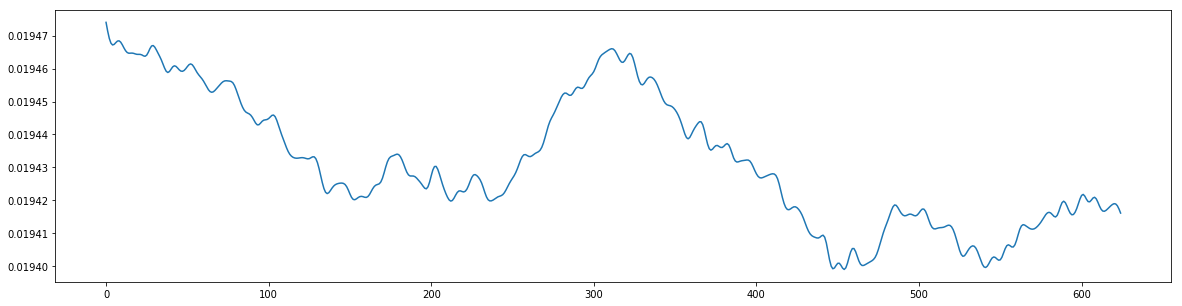

In [52]:
filtered = hp.filtersignal(data = raw_ppg, cutoff = 3, sample_rate = 25, order = 3, filtertype='lowpass')

plt.figure(figsize = (20,5))
plt.plot(filtered)

In [ ]:
filtered

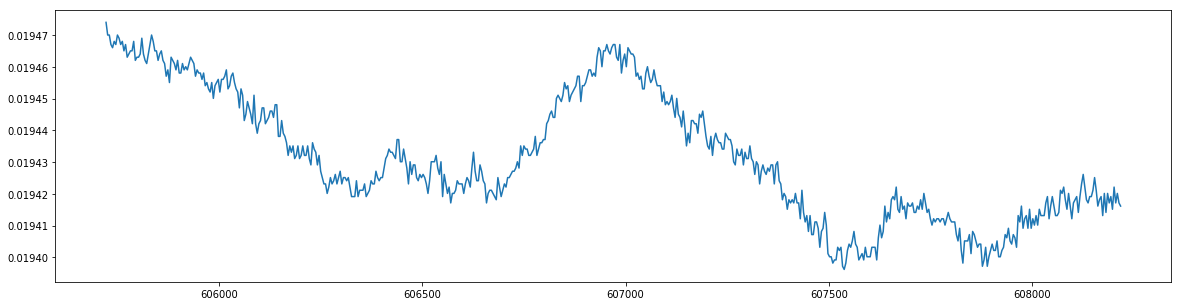

In [43]:
r_pkg1 = raw_data['/optical_streams/red/pkg1']
ppg_cut = r_pkg1[(r_pkg1.utc>1525209300)&(r_pkg1.utc<1525209325)]
raw_ppg = ppg_cut.pd1 / ppg_cut.drive_i / ppg_cut.gain_value
plt.figure(figsize = (20,5))
plt.plot(raw_ppg)


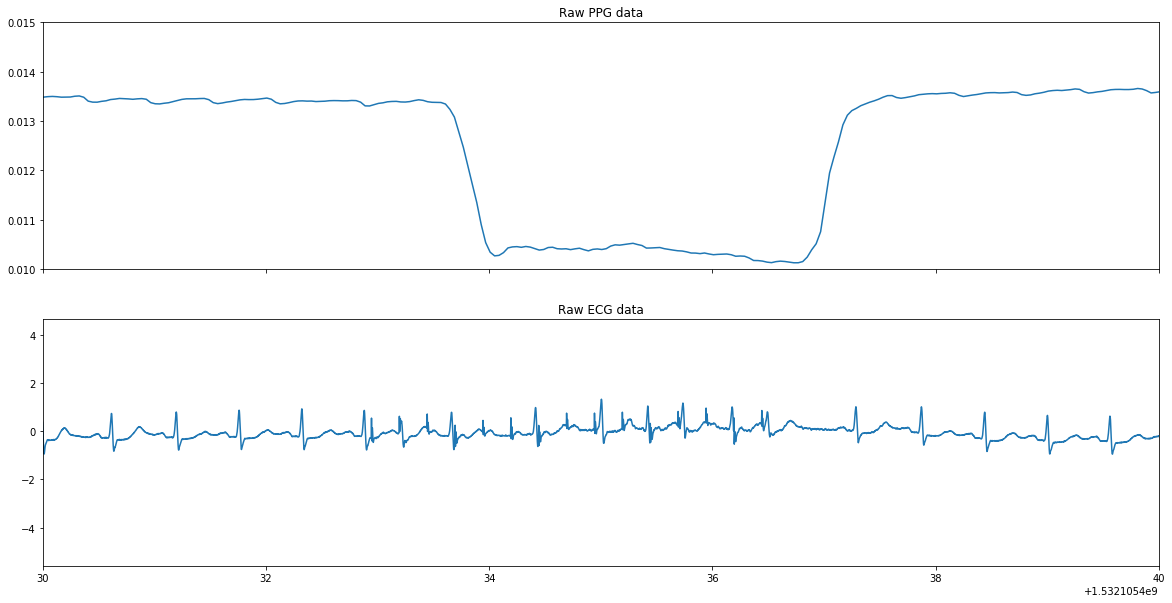

In [16]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (20,10))
ax[0].set_xlim([1532105430,1532105440])
ax[0].set_ylim([0.01,0.015])

r_pkg1 = raw_data['/optical_streams/red/pkg1']
ax[0].plot(r_pkg1.utc, r_pkg1.pd1 / r_pkg1.drive_i / r_pkg1.gain_value)
ax[0].title.set_text('Raw PPG data')
ax[1].plot(ecg_data.utc_adjusted, ecg_data.II)
ax[1].title.set_text('Raw ECG data')

# ax[2].plot(ecg_analysis.utc, ecg_analysis.ecg_heart_rate, c='k', label='ECG Heart Rate', )
# ax[2].plot(alg_data['/pulse_rate_alg'].utc, alg_data['/pulse_rate_alg'].bpm_raw, label='PPG Pulse Rate', c='b')
# ax[2].title.set_text('Heart rate from PPG and ECG')

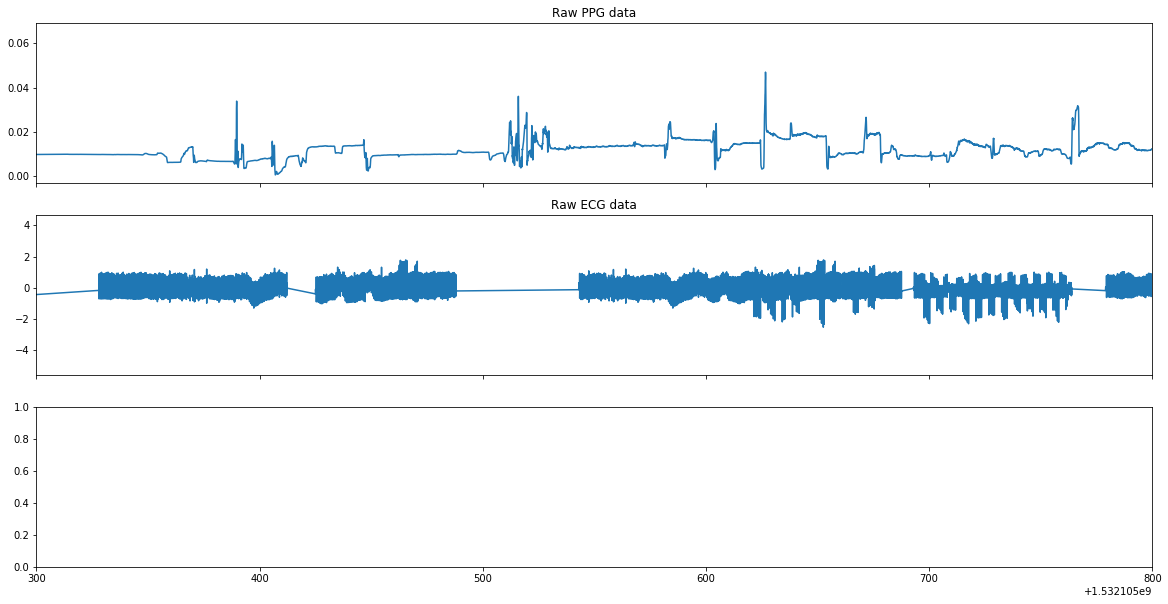

In [10]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (20,10))
ax[0].set_xlim([1532105300,1532105800])
# ax[0].set_ylim([0.0194,0.0195])

r_pkg1 = raw_data['/optical_streams/red/pkg1']
ax[0].plot(r_pkg1.utc, r_pkg1.pd1 / r_pkg1.drive_i / r_pkg1.gain_value)
ax[0].title.set_text('Raw PPG data')
ax[1].plot(ecg_data.utc_adjusted, ecg_data.II)
ax[1].title.set_text('Raw ECG data')

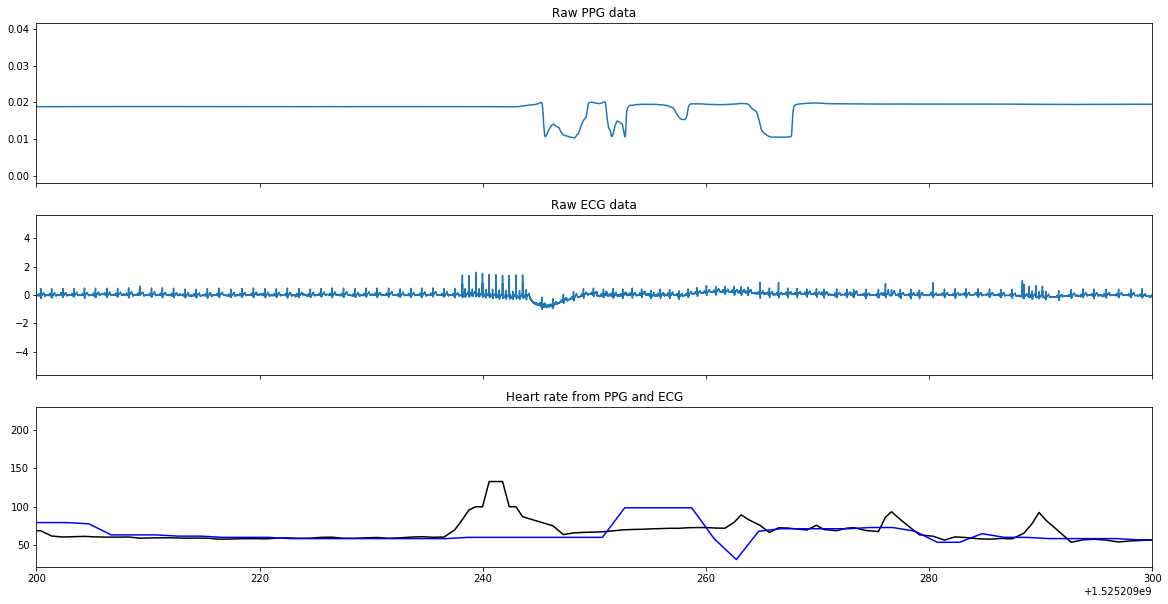

In [95]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (20,10))
ax[0].set_xlim([1525209200,1525209300])
# ax[0].set_ylim([0.0194,0.0195])

r_pkg1 = raw_data['/optical_streams/red/pkg1']
ax[0].plot(r_pkg1.utc, r_pkg1.pd1 / r_pkg1.drive_i / r_pkg1.gain_value)
ax[0].title.set_text('Raw PPG data')
ax[1].plot(ecg_data.utc_adjusted, ecg_data.II)
ax[1].title.set_text('Raw ECG data')

ax[2].plot(ecg_analysis.utc, ecg_analysis.ecg_heart_rate, c='k', label='ECG Heart Rate', )
ax[2].plot(alg_data['/pulse_rate_alg'].utc, alg_data['/pulse_rate_alg'].bpm_raw, label='PPG Pulse Rate', c='b')
ax[2].title.set_text('Heart rate from PPG and ECG')

In [17]:
alg_data['/pulse_rate_alg'].columns

Index(['bpm_raw', 'bpm_conf', 'utc', 'bpm_track'], dtype='object')

## ts, te is from chunk time stamp

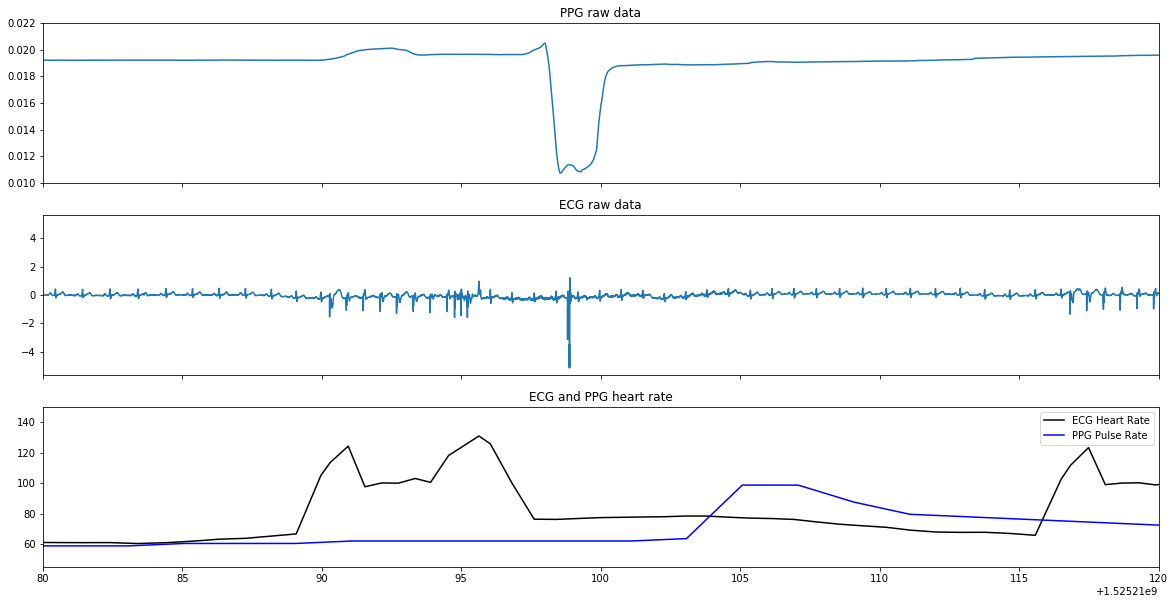

In [94]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (20,10))
ax[0].set_xlim([ts,te])

r_pkg1 = raw_data['/optical_streams/red/pkg1']
#r_pkg2 = raw_data2['/optical_streams/red/pkg1']

data_ppg = r_pkg1.pd1/ r_pkg1.drive_i / r_pkg1.gain_value
#data_ppg2 = r_pkg2.pd1/ r_pkg2.drive_i / r_pkg2.gain_value*1.1
ax[0].plot(r_pkg1.utc, data_ppg)
#ax[0].plot(r_pkg2.utc, data_ppg2,c='r')
ax[0].set_ylim([0.01,0.022])
ax[0].title.set_text('PPG raw data')


ax[1].plot(ecg_data.utc_adjusted, ecg_data.II)
ax[1].title.set_text('ECG raw data')

ax[2].plot(ecg_analysis.utc, ecg_analysis.ecg_heart_rate, c='k', label='ECG Heart Rate' )
ax[2].plot(alg_data['/pulse_rate_alg'].utc, alg_data['/pulse_rate_alg'].bpm_raw, label='PPG Pulse Rate', c='b')
#ax[2].plot(alg_data2['/pulse_rate_alg'].utc, alg_data2['/pulse_rate_alg'].bpm_raw, label='PPG Pulse Rate', c='r')
ax[2].set_ylim(45,150)
ax[2].title.set_text('ECG and PPG heart rate')
ax[2].legend()

## PPG-heart rate algorithm sampling rate

In [48]:
ts = 1525210000
te = 1525210490

In [49]:
ppg_t = alg_data['/pulse_rate_alg'].utc[(alg_data['/pulse_rate_alg'].utc>ts) & (alg_data['/pulse_rate_alg'].utc<te)]
np.mean(np.diff(ppg_t))

2.0008217262440042

## Cut and save those heart rate data points to variables. 
### Note: the utc column in ecg_analysis is NOT evenly distributed. This may cause error when doing interpolation & 1D ccf.
### Can't use expression like t = np.linspace(ts,te, len(hr))

In [50]:
ecg_hr = ecg_analysis.ecg_heart_rate[(ecg_analysis.utc>ts) & (ecg_analysis.utc<te)]
ecg_t = ecg_analysis.utc[(ecg_analysis.utc>ts) & (ecg_analysis.utc<te)]
ppg_hr = alg_data['/pulse_rate_alg'].bpm_raw[(alg_data['/pulse_rate_alg'].utc>ts) & (alg_data['/pulse_rate_alg'].utc<te)]

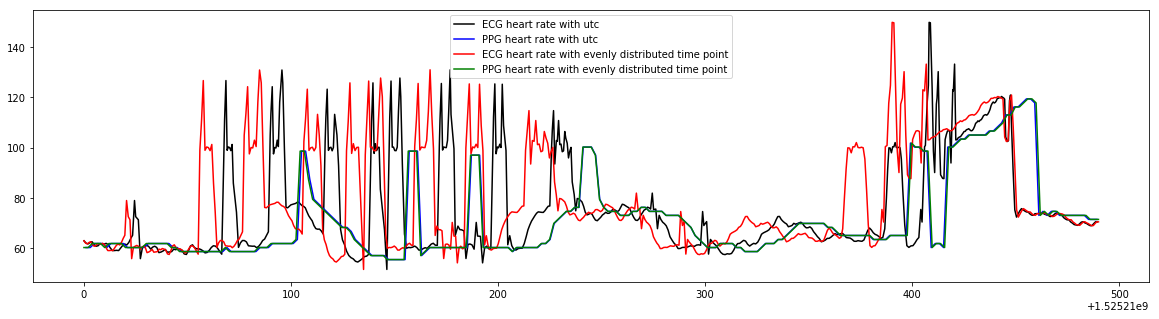

In [51]:
ecg_t2 = np.linspace(ts,te, len(ecg_hr))
ppg_t2 = np.linspace(ts,te, len(ppg_hr))
plt.figure(figsize = (20,5))
plt.plot(ecg_t,ecg_hr,c='k',label='ECG heart rate with utc')
plt.plot(ppg_t,ppg_hr,c='b',label='PPG heart rate with utc')
plt.plot(ecg_t2,ecg_hr,c='r',label='ECG heart rate with evenly distributed time point')
plt.plot(ppg_t2,ppg_hr,c='g',label='PPG heart rate with evenly distributed time point')
plt.legend()

# Heart rate correlation

https://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html

## Note: these three columns are aligned with each other:
* 1.ecg_data['utc_adjusted']
* 2.alg_data['/pulse_rate_alg'].utc
* 3.ecg_analysis.utc
* Instead of using raw data to do cross correlation, use heart rate signals because they have similar patterns.

https://stackoverflow.com/questions/19642443/use-of-pandas-shift-to-align-datasets-based-on-scipy-signal-correlate

In [52]:
print(len(ecg_hr),'/',len(ppg_hr),'=',len(ecg_hr)/len(ppg_hr))

596 / 245 = 2.4326530612244897


# !!Interpolation method to make PPG_hr same length as ECG_hr

In [53]:
ppg_hr_interp = np.interp(ecg_t,ppg_t,ppg_hr)

Text(0.5, 0, 'Time/sec')

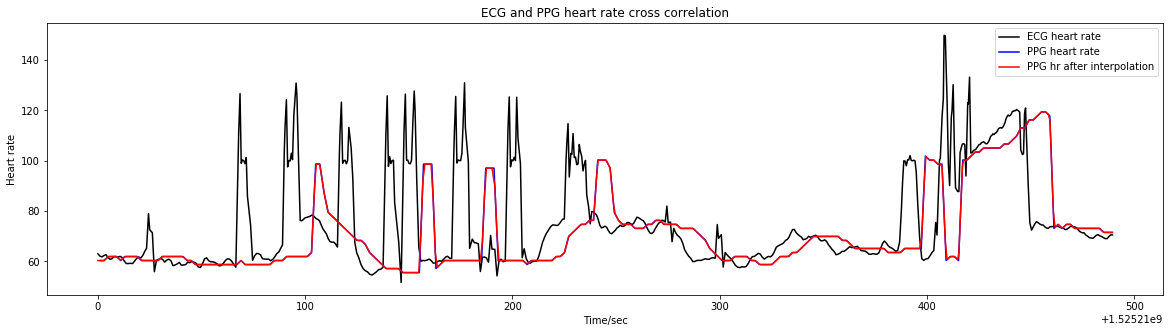

In [54]:
plt.figure(figsize=(20,5))
plt.plot(ecg_t,ecg_hr,c = 'k',label = 'ECG heart rate')
plt.plot(ppg_t,ppg_hr,c = 'b', label = 'PPG heart rate')
plt.plot(ecg_t,ppg_hr_interp,c = 'r', label = 'PPG hr after interpolation')
plt.legend()
plt.title('ECG and PPG heart rate cross correlation')
plt.ylabel('Heart rate')
plt.xlabel('Time/sec')

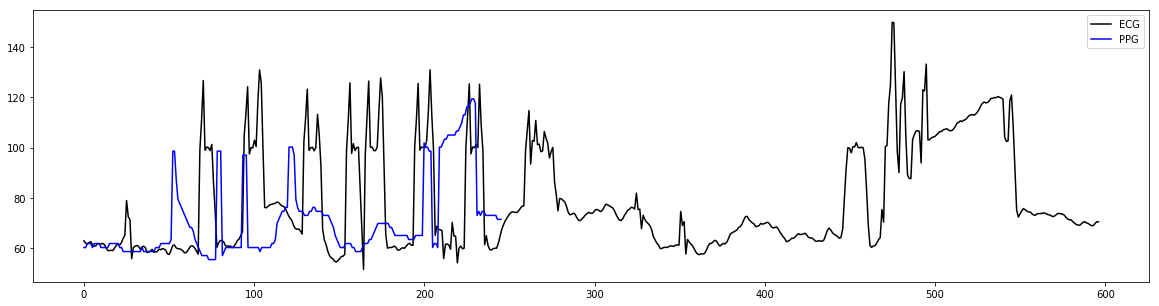

In [55]:
plt.figure(figsize=(20,5))
a = np.linspace(0,len(ecg_hr),len(ecg_hr))
b = np.linspace(0,len(ppg_hr),len(ppg_hr))
plt.plot(a,ecg_hr,c = 'k',label = 'ECG')
plt.plot(b,ppg_hr,c = 'b',label = 'PPG')
plt.legend()

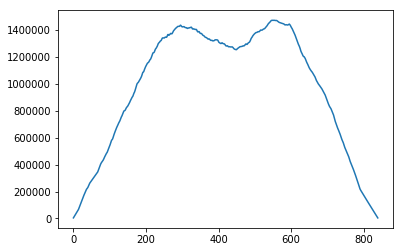

In [56]:
plt.plot(signal.correlate(ecg_hr,ppg_hr))

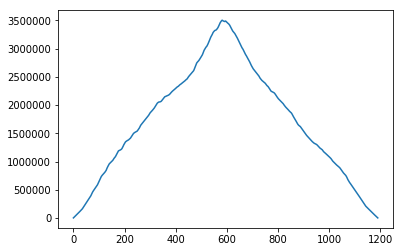

In [57]:
plt.plot(signal.correlate(ecg_hr,ppg_hr_interp))

In [58]:
np.argmax(signal.correlate(ecg_hr,ppg_hr_interp))

581

### Notice: the length of these hr array are 611. Why?

## Set the min value of heart rate to 0.

In [59]:
ecg_ccf = []
ppg_ccf = []
minhr = min(ecg_hr)
for i in ecg_hr:
    ecg_ccf.append(i-minhr)
for i in ppg_hr_interp:
    ppg_ccf.append(i-minhr)

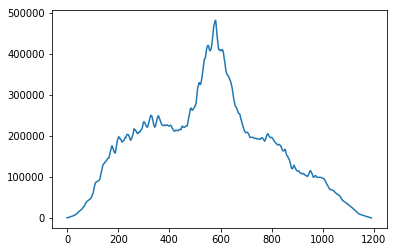

In [60]:
plt.plot(signal.correlate(ecg_ccf,ppg_ccf))

In [61]:
np.argmax(signal.correlate(ecg_ccf,ppg_ccf))

580

https://stackoverflow.com/questions/19642443/use-of-pandas-shift-to-align-datasets-based-on-scipy-signal-correlate

#### Real time stamp

In [62]:
shift2 = ecg_t.iloc[len(ecg_t)-1] - ecg_t.iloc[np.argmax(signal.correlate(ecg_ccf,ppg_ccf))]

#### Average time interval

In [63]:
dx = np.mean(np.diff(ecg_t))
shift1 = (len(ecg_ccf)-1 - np.argmax(signal.correlate(ecg_ccf,ppg_ccf)))*dx
shift = (shift1+shift2)/2
print('The ECG signal should be right shifted',shift, 'secs to align with PPG signal')

The ECG signal should be right shifted 12.617696345353327 secs to align with PPG signal


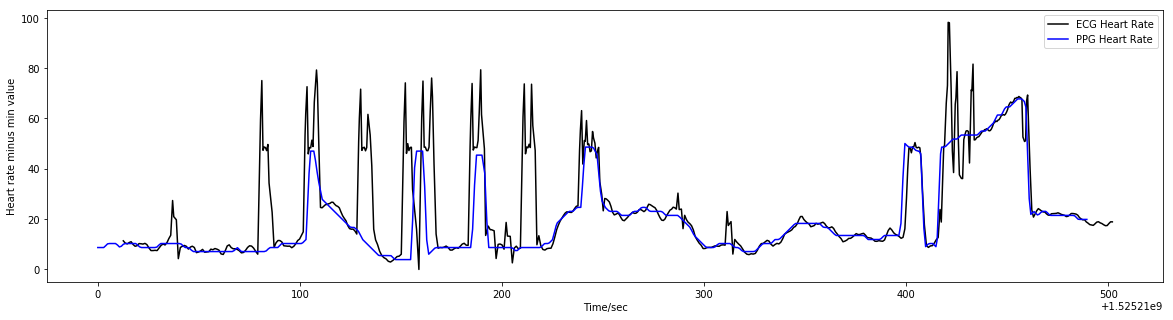

In [64]:
plt.figure(figsize=(20,5))
plt.plot(ecg_t+shift,ecg_ccf,c = 'k',label = 'ECG Heart Rate')
plt.plot(ecg_t,ppg_ccf,c = 'b', label = 'PPG Heart Rate')
plt.xlabel('Time/sec')
plt.ylabel('Heart rate minus min value')
plt.legend()

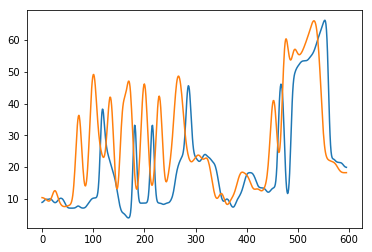

In [65]:
from scipy.ndimage import gaussian_filter
smooth_ecg = gaussian_filter(ecg_ccf, sigma=5)
smooth_ppg = gaussian_filter(ppg_ccf, sigma=3)
plt.plot(smooth_ppg)
plt.plot(smooth_ecg)

In [66]:
ECGdata = {'t': ecg_t+shift, 
        'q': gaussian_filter(ecg_hr, sigma=5)
        }

ecg_df = pd.DataFrame(ECGdata)

PPGdata = {'t': ppg_t, 
        'q': gaussian_filter(ppg_hr, sigma=3)
        }
ppg_df = pd.DataFrame(PPGdata)

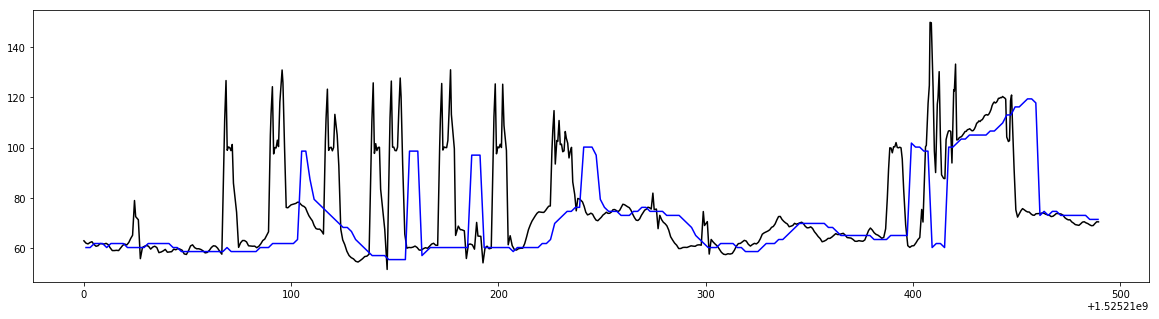

In [67]:
plt.figure(figsize=(20,5))
plt.plot(ecg_t,ecg_hr,c = 'k',label = 'ECG heart rate')
plt.plot(ppg_t,ppg_hr,c = 'b', label = 'PPG heart rate')

In [68]:

ts = 1525210225
te = 1525210490

In [69]:
ecg_df = ecg_df.loc[(ecg_df['t'] >= ts) & (ecg_df['t'] <= te)]
ppg_df = ppg_df.loc[(ppg_df['t'] >= ts) & (ppg_df['t'] <= te)]

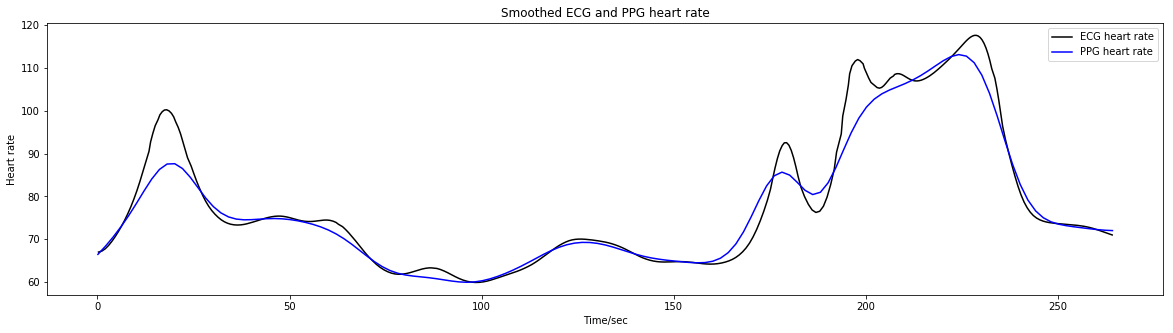

In [70]:
plt.figure(figsize=(20,5))
plt.plot(ecg_df['t']-ts,ecg_df['q'],c = 'k',label = 'ECG heart rate')
plt.plot(ppg_df['t']-ts,ppg_df['q'],c = 'b',label = 'PPG heart rate')
plt.title('Smoothed ECG and PPG heart rate')
plt.ylabel('Heart rate')
plt.xlabel('Time/sec')
plt.legend()

In [71]:
ecg_df.to_csv('F:\\360MoveData\\Users\\admin\\Desktop\\ECG.csv')

ppg_df.to_csv('F:\\360MoveData\\Users\\admin\\Desktop\\PPG.csv')

# RRinterval IBI correlation

## Issues:
* Heart rate vectors don't share same length. (For 1650 secs signal, we have 1796 ECG data points and 574 PPG data points) -- Interpolation method to upsample the PPG heart rate. -----Solved
* The offset of x-axis is not a constant -- need scaling? ---Cut section instead of scaling.  ---DTW may work better

![IBI](https://support.empatica.com/hc/article_attachments/360032283952/blobid0.png)